In [1]:
from common import *

<html>
<center>
    <h1>Advanced Machine Learning (UE15CS315)</h1>
    <h1>End Semester Assessment</h1>
    <h3>18th December - 21st December 2018</h3>
    <h3><pre>
 Name           	 USN          	
----------------	--------------	
 Varun V        	 01FB15ECS341 	
 Varun Vora     	 01FB15ECS342 	
 Vinay GB       	 01FB15ECS350 	
 Vinayak Awanti 	 01FB15ECS351 	
</pre></h3>
    
</center>
</html>

In [2]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

from dataset_loader import get_img, img_loader


C:\Users\Varun\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h2>Checkpoint 1</h2>

FIRST 10
   female  baby  child  teenager  youth  middleAge  senior
0       1    -1     -1        -1      1         -1      -1
1       1    -1     -1        -1     -1         -1      -1
2       1    -1     -1         1     -1         -1      -1
3      -1    -1     -1         1     -1         -1      -1
4       1    -1     -1        -1     -1          1      -1
5       1    -1     -1         1     -1         -1      -1
6       1    -1     -1         1     -1         -1      -1
7       1    -1     -1        -1      1         -1      -1
8       1    -1     -1         1     -1         -1      -1
9       1    -1     -1         1     -1         -1      -1


LAST 10
       female  baby  child  teenager  youth  middleAge  senior
46826       1    -1     -1        -1     -1         -1      -1
46827       1    -1     -1        -1      1         -1      -1
46828       1    -1     -1        -1      1         -1      -1
46829       0    -1     -1        -1     -1         -1      -1
46830       1    

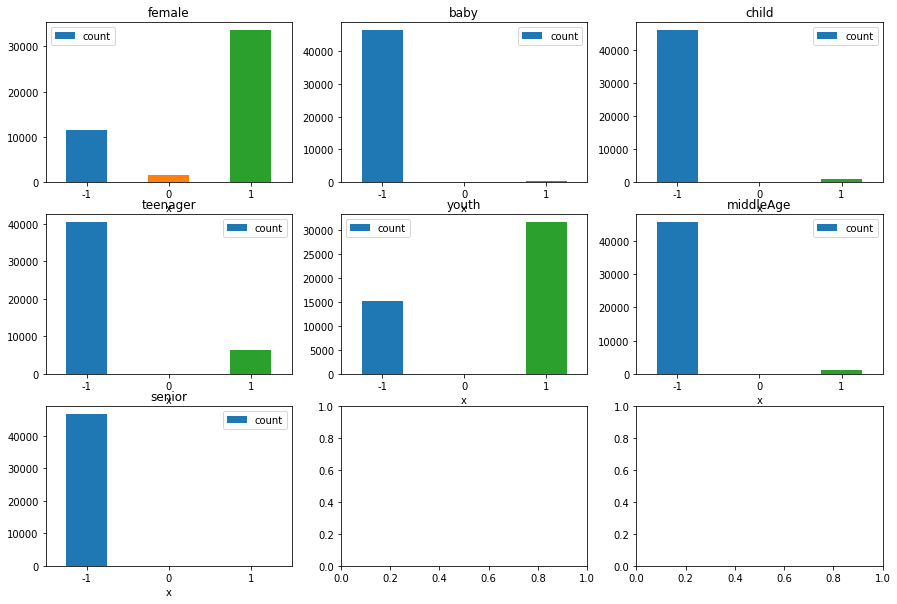

In [3]:
from checkpoints import analyze_dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ctr = 0
for df, column in analyze_dataset():
    ax = df.plot.bar(x="x", y="count", rot=0, title=column, ax=axes[ctr//3, ctr%3])
    ctr += 1
plt.show()

<p>The analysis done using pandas shows that the data is highly skewed towards classes female and youth. So we have to augment the dataset either by adding images of other classes or removing images from female and youth classes<p>
   
<h2>Checkpoint 2</h2>
<p>Now we created a new augmented dataset of 70000 samples by adding images to classes having fewer than 10000 images and removing images from classes having greater than 10000 images. Now we created a network using ResNet50 as the backbone. We removed the top layers and added 2 dense layers for classification of the input. The plots for training and validation loss are shown below. </p>
<table>
    <tr>
        <td><img src="images/dist_before.png"></img></td>
        <td><img src="images/dist_after.png"></img></td>
    </tr>
</table>


<p> We wrote <a href="./dataset_loader.py">a dataset_generator function</a> that splits the dataset into train and test and yields batch_size number of samples from the dataset. This will be used for all models in the future </p>

<h3> Model 1 </h3>
<p> An architecture was designed to predict the gender from the image and the age group. This was done with a simple CNN with 2 different outputs using functional API. One output is a binary classifier with sigmoid activation and binary crossentropy loss to tell if it is a female. The second output has 6 units with a softmax output and categorical crossentropy loss which classifies the age group viz. baby, child, teenager, youth, middle_age, senior. </p>

<img src="images/model_image.1.png"></img><p>Fig1. The first model with image input and branched output of female and age</p>

<p> We trained it with early stopping with patience of 8. This model had an accuracy of 59%.</p>


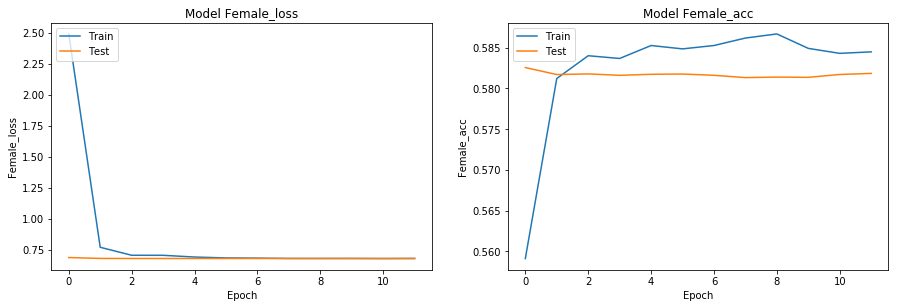

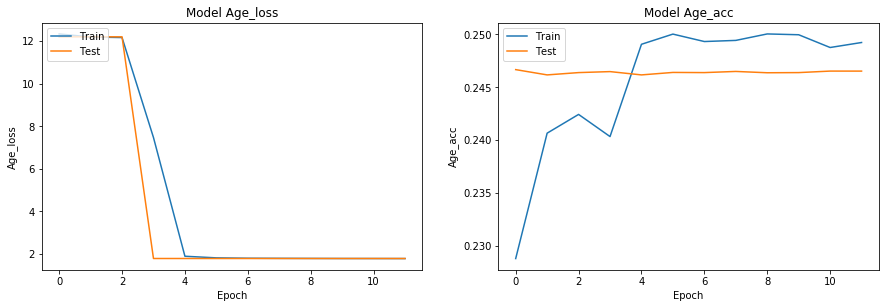

In [4]:
from checkpoints import plot_graph

with open("pickled_history.1.pkl", "rb") as f:
    history = pickle.load(f)
plot_graph(history, ['Female_loss', 'Female_acc'])
plot_graph(history, ['Age_loss', 'Age_acc'])

<h2> Checkpoint 3 </h2>
We predict the outcome sing the model trained above (Model 1) on some selfies we downloaded from Google images. The validation accuracy for female is 59% and age group is 24% on the augmented dataset.


Model1: Gender and age predictions



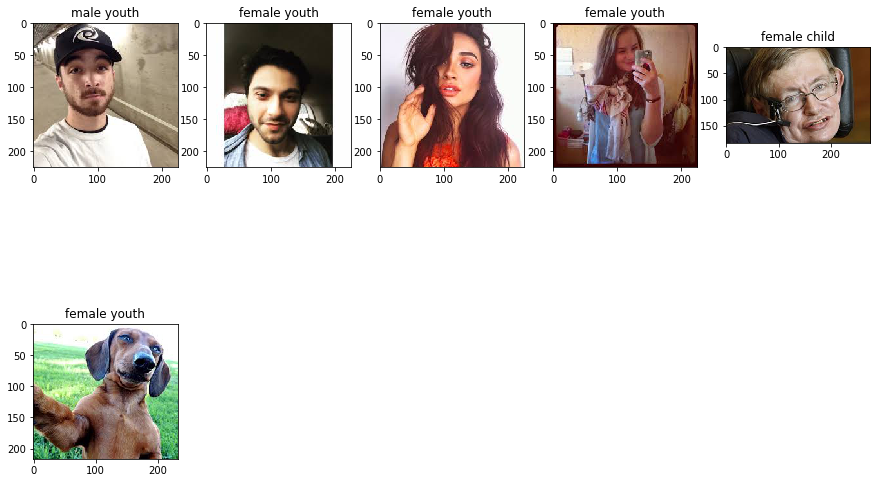

In [5]:
from checkpoints import try_model
model = load_model('weights/weights.1.01.h5')
try_model(model, num_samples=6, io=1)


<h3> Model 2 </h3>
Now we train a new model to predict all the attributes from an image. This is a simple model that takes an image as the input and has 36 output units with sigmoid activation and binary crossentropy loss. 
<img src="images/model_image.2.png"></img><p>Fig2. The second model with image input and branched output to female and all other attributes</p>
Following a graph of the training history and predictions on samples from augmented dataset 


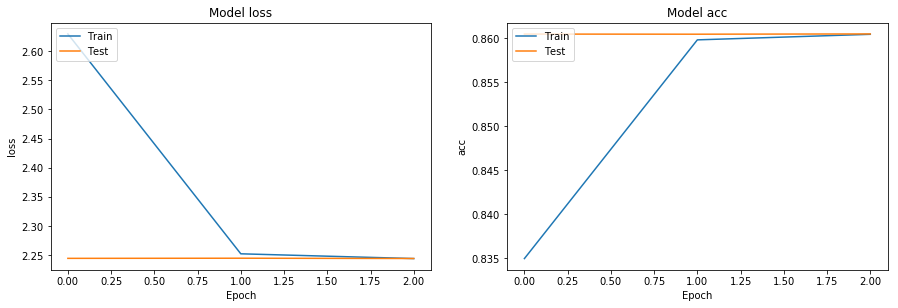


Model2: Other attribute predictions

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
with open("pickled_history.2.pkl", "rb") as f:
    history = pickle.load(f)
plot_graph(history, ['loss', 'acc'])
# swtich window
model = load_model('weights/weights.2.01.h5')
try_model(model, num_samples=6, io=2)

<h2>Checkpoint 4 (Day 2)</h2>
<p>Multiple classifiers and regressors are attached to the a simple convolutional backbone. A regression head is attached to determine the popularity score of the given image along with the attributes. Both these neural networks have relu output and were trained to minimize mean squared error</p>
<table align="center" width="100%">
    <tr align="center"><td align="center"><h3>Model 3</h3></td><td align="center"><h3>Model 4</h3></td></tr>
</table>
<table>
    <tr>
        <td><img src="images/model_image.3.png"></img><p>Fig3. Given the image, predict the popularity score along with all the attributes</p></td>
<td><img src="images/model_image.4.png"></img><p>Fig4. Given the attributes predict the popularity score</p></td>
</tr>
<table>


Model 3


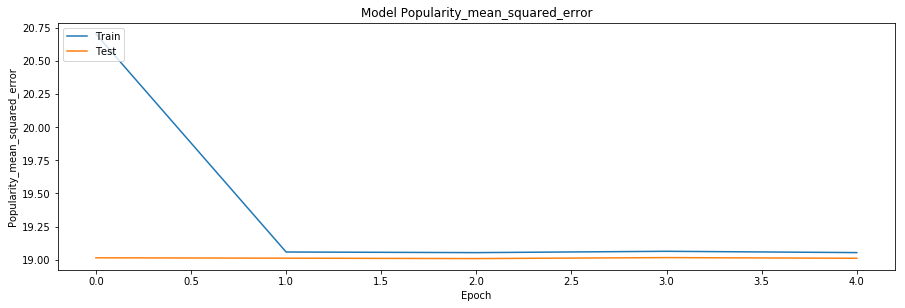

Model 4


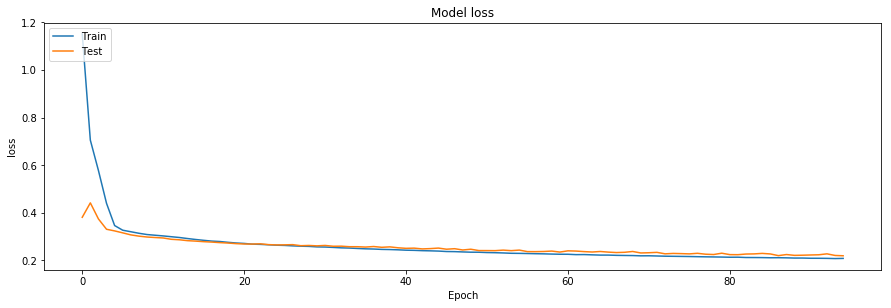


Model3: Popularity score and other attributes

('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Popularity score: 0.0', [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


C:\Users\Varun\PycharmProjects\CVCR-Selfie\dataset_loader.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_list = train_df.as_matrix()



Model4: Popularity score from attributes

Expected: [3.776 4.466 4.338 5.179 5.697 3.567]
Actual: [4.299463, 4.3346024, 4.3968325, 5.1527915, 4.0861583, 4.2705474]


In [7]:
from checkpoints import plot_graph
pop_mse = 'Popularity_mean_squared_error'
print("Model 3")
with open('pickled_history.3.pkl', 'rb') as fp:
    history = pickle.load(fp)
plot_graph(history, ['Popularity_mean_squared_error'])

print("Model 4")
with open('pickled_history.4.pkl', 'rb') as fp:
    history = pickle.load(fp)
plot_graph(history, ['loss'])

try_model(load_model("weights/weights.3.01.h5"), num_samples=6, io=3)
try_model(load_model("weights/weights.4.01.h5"), num_samples=6, io=4)


The mean squared error from Model 3 saturates at 19. The mean squared error from Model 4 performs much better in comparison. It's error saturates at 0.22
<h2> Checkpoint 5 </h2>
We demonstrate the outcome of the above models on more images


Model5: Quality of image



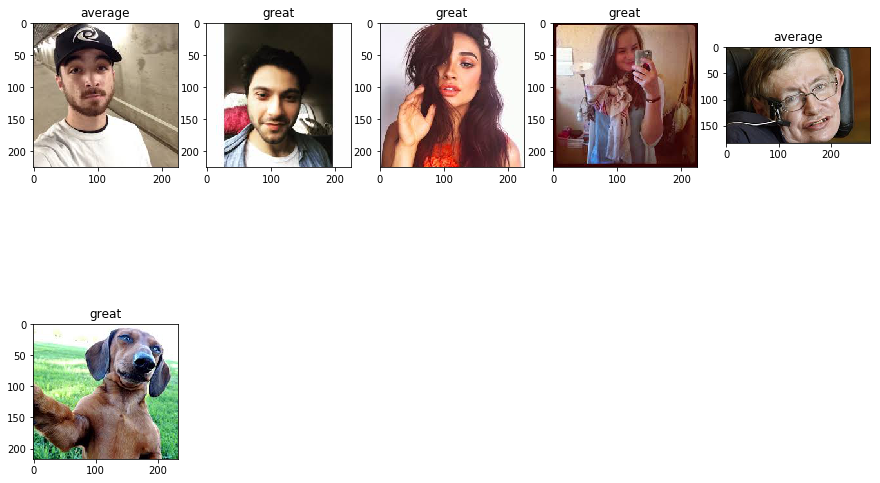

In [8]:
model = load_model('weights/weights.5.01.h5')
try_model(model, num_samples=6, io=5)


<h2>Checkpoint 6 (Day 3)</h2>
<p>To evaluate whether a selfie is great, average or poor, we analysed the popularity score in the dataset. Selfie whose popularity score is above 75 percentile is great, below 25 percentile is poor and remaining are average.
<p> As part of checkpoint 6 we developed two more model on top of Model 3 and Model 4 to predict the quality of a selfie viz. poor, average, good. We removed the top most layer of model 4 and added a layer with 3 neurons one each for different qualities of selfies viz. poor, average and great. Below we compare the different attributes and their influence on the popularity score.<p>

Model 5


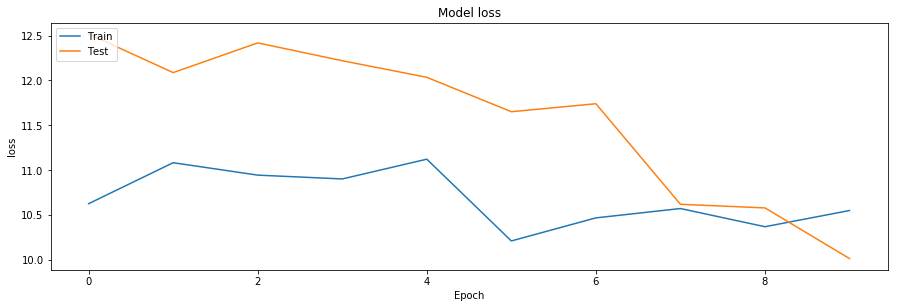

Model 6


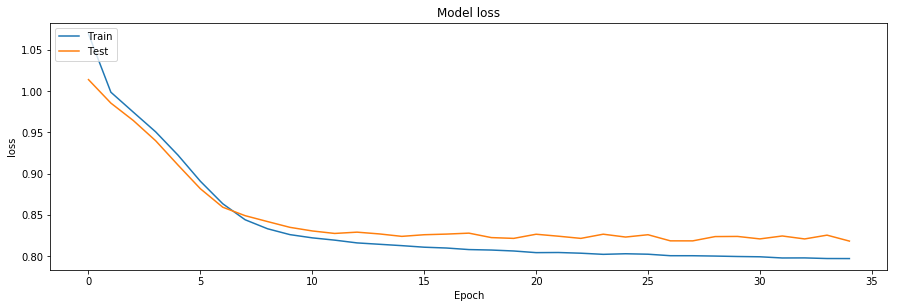

In [9]:
print("Model 5")
with open('pickled_history.5.pkl', 'rb') as fp: 
    history = pickle.load(fp)
plot_graph(history, ['loss'])

print("Model 6")
with open('pickled_history.6.pkl', 'rb') as fp:
    history = pickle.load(fp)
plot_graph(history, ['loss'])


To understand which attributes most influence the popularity score, we directly use Pandas to find the correlation between each individual attributes with the popularity score. 

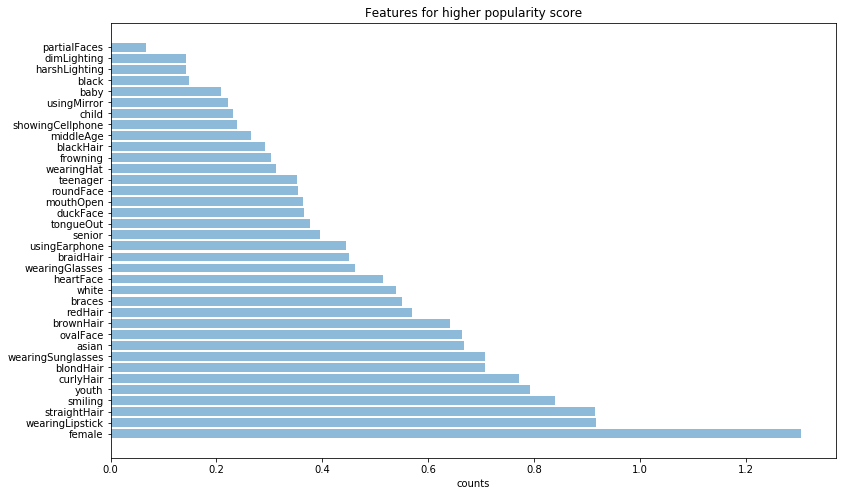

In [10]:
df = pd.read_csv('Selfie-dataset/selfie_dataset.txt', delim_whitespace=True, header=None)
d = dict()
for i in df.columns.difference([col['popularityScore'], col['imageName']]):
    d[i] = df[col['popularityScore']].corr(df[i])
sorted_x = sorted(d.items(), key=lambda x : x[1], reverse=True)
reverse_dict = {col[x] : x for x in col}
sorted_x = [(reverse_dict[y[0]], y[1]) for y in sorted_x]

feat = [y[0] for y in sorted_x]
counts = [(y[1] + 0.05) * 8 for y in sorted_x]

y_pos = np.arange(len(feat))
plt.figure(figsize=(13, 8))
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, feat)
plt.xlabel('counts')
plt.title('Features for higher popularity score')
plt.show()